#### 공부시간과 과외 횟수에 따른 점수 예측하기
- 목표 : 공부시간과 과외횟수가 가지는 패턴/규칙을 찾아서 점수를 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간, 과외 횟수
- 타겟 : 점수
- 학습방법 : 지도학습 -> 회귀
- 알고리즘 : 선형회귀 -> 조건 데이터분포가 선형일 때 가능

In [2]:
# 규칙 / 패턴 -> 공부시간과 과외횟수에 점수결정
# 공부시간과 과외시간이 얼마나 점수에 영향을 미치는지
# 피쳐가 2개 들어감 
# 점수 = (공부시간 * 기울기값[가중치]) + (과외횟수* 기울기값[가중치]) + 절편
# y = ax + bx + c 를 구하면 점수를 예측할 수 있다.
# 피쳐가 늘어갈 수록 각각의 피쳐들이 정수에 영향을 미치는지는 달라짐
# 피쳐가 늘어가는걸 다변량 -> 피쳐가 많은걸 다중선형회귀라고함.


#### 1. 데이터 준비

In [3]:
hour = [1,3,4,5,7,9,10]
jumsu = [32,55,83,70,99,92,100]
lesson = [0,0,2,1,2,0,1]

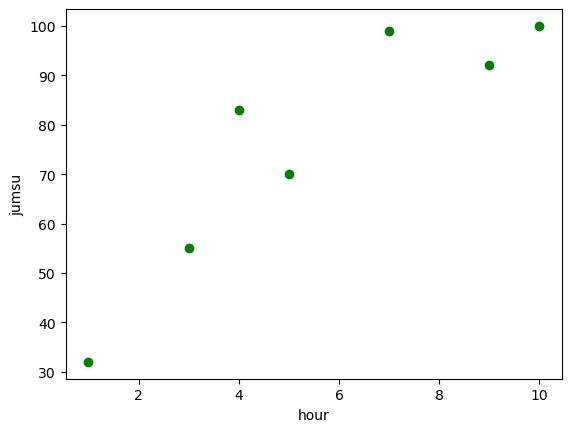

In [20]:
## 현재 데이터 분포 확인
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(hour, jumsu, 'go')
plt.xlabel('hour')
plt.ylabel('jumsu')
plt.show()

In [23]:
datadf = pd.DataFrame({'hour':hour, 'Lesson':lesson})
jumsusr=pd.Series(jumsu)
datadf
jumsu
# 피쳐가 여러개 있는 다중선형 회귀 만들거임

[32, 55, 83, 70, 99, 92, 100]

#### 모델 생성 및 학습 진행

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# 모듈 인스턴스 생성
model = LinearRegression()
model.fit(datadf, jumsusr)

LinearRegression()

In [26]:
# 학습 후 모델 파라미터 -> 피쳐가 2개이기 때문에 coef_ 값도 2개나옴.
print(f'기울기:{model.coef_}, 절편: {model.intercept_}')

기울기:[ 6.27924892 11.61819933], 절편: 30.914299470390006


#### 3. 모델 성능 평가

In [16]:
# 오차 계산 즉, 손실/비용 함수 확인
# ver 1.4 이상 root_mean_squared_error 사용 가능
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 회귀 모델의 성능을 평가하는 지표

In [30]:
# 점수 내부에서 predict를 진행 -> 결과로 R2 결정계수 값을 추출해서 반환
score = model.score(datadf, jumsusr)
print(f'score : {score}')

# 오차계산 : 오차 계산은 예측 값과 실제 값 간의 차이를 측정하여 모델의 성능을 평가하는 방법
# 결정계수 : 결정 계수는 회귀 분석에서 모델이 데이터를 얼마나 잘 설명하는지를 나타내는 지표입니다. 
# R² 값은 0과 1 사이에 위치하며, 값이 1에 가까울수록 모델이 데이터를 잘 설명한다는 의미

# 오차계산과 결정계수 계산
pre_jumsu= model.predict(datadf)
print(pre_jumsu)

score : 0.9649627963178466
[ 37.19354839  49.75204622  79.26769379  73.92874338  98.10544054
  87.42753972 105.32498796]


In [31]:
# 오차 계산 함수들임 -> 정답과 예측값(predcit)을 줘야함
mse = mean_squared_error(jumsusr, pre_jumsu)
rmse = mean_squared_error(jumsusr, pre_jumsu, squared=False)
mae = mean_absolute_error(jumsusr, pre_jumsu)

# 얼마나 정답에 가깝게 값을 예측했느냐를 나타내는 지표.
r2 = r2_score(jumsusr, pre_jumsu)

In [32]:

print(mse)
# 평균 제곱 오차는 예측 값과 실제 값 간의 차이를 제곱하여 평균을 구한 값
# # 값이 작을 수록 모델의 성능이 좋음을 나타냄
print(rmse)


print(mae)
# 평균 절대 오차는 예측 값과 실제 값 간의 차이의 절대값을 평균한 값
# 값이 작을 수록 모델의 성능이 좋음을 나타냄

print(r2)
# 결정 계수 : 모델이 데이터의 변동성을 얼마나 설명하는지 지표임.
# 1에 가까울 수록 모델이 데이터를 잘 설명함
# 회귀 모델을 평가할 때 사용

19.134603480294373
4.374311772187069
4.127794208680101
0.9649627963178466
